In [51]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import pickle

Data collection and processing


In [52]:
data=pd.read_csv('Rainfall.csv')
data.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [53]:
data.shape

(366, 12)

In [54]:
data.tail()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9
365,31,1026.4,20.5,17.8,15.5,13.0,74,66,no,5.7,20.0,23.3


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [56]:
data.columns=data.columns.str.strip()

In [57]:
data.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [58]:
data=data.drop(columns=["day"])

In [59]:
data.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [60]:
data.isnull().sum()

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    1
windspeed        1
dtype: int64

In [61]:
data["winddirection"]=data["winddirection"].fillna(data["winddirection"].mode()[0])

In [62]:
data.isnull().sum()

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    0
windspeed        1
dtype: int64

In [63]:
data["windspeed"]=data["windspeed"].fillna(data["windspeed"].median())

In [64]:
data.isnull().sum()

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    0
windspeed        0
dtype: int64

In [65]:
data["rainfall"].unique()

array(['yes', 'no'], dtype=object)

convert yes as 1 and no as 0

In [66]:
data["rainfall"]=data["rainfall"].map({"yes": 1,"no": 0})

In [67]:
data.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,1,0.0,40.0,13.7


EDA


In [68]:
sns.set(style="whitegrid")

In [69]:
data.describe()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,0.680328,4.419399,101.284153,21.534153
std,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,0.466988,3.934398,81.722827,10.056054
min,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,0.000000,10.000000,4.400000
25%,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.000000,0.500000,40.000000,13.725000
50%,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,1.000000,3.500000,70.000000,20.500000
75%,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,1.000000,8.200000,190.000000,27.825000
max,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,1.000000,12.100000,350.000000,59.500000


In [70]:
data.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')

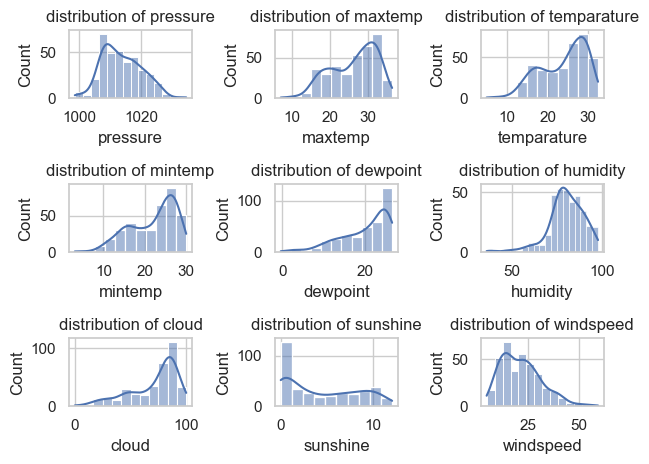

In [71]:
plt.Figure(figsize=(15,10))
for i,column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity','cloud','sunshine','windspeed'],1):
    plt.subplot(3,3,i)
    sns.histplot(data[column],kde=True)
    plt.title(f"distribution of {column}")
plt.tight_layout()   
plt.show() 


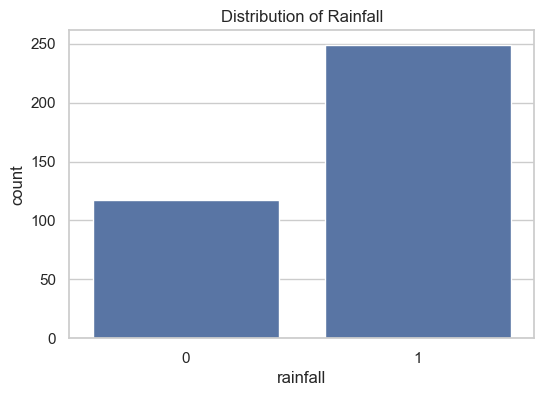

In [72]:
plt.figure(figsize=(6,4))
sns.countplot(x="rainfall",data=data)
plt.title("Distribution of Rainfall")
plt.show()

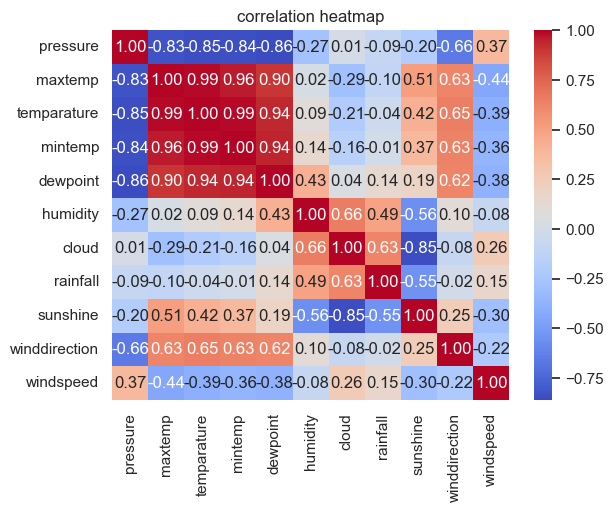

In [73]:
#correlation matrix
plt.Figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,cmap="coolwarm",fmt=".2f")
plt.title("correlation heatmap")
plt.show()


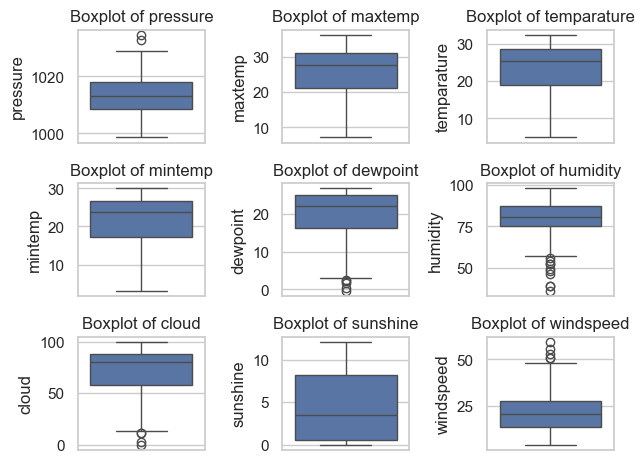

In [74]:
plt.Figure(figsize=(15,10))
for i,column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity','cloud','sunshine','windspeed'],1):
    plt.subplot(3,3,i)
    sns.boxplot(data[column])
    plt.title(f"Boxplot of {column}")
plt.tight_layout()   
plt.show() 


Data Preprocessing

In [75]:
#drop correlated columns
data=data.drop(columns=['maxtemp', 'temparature', 'mintemp'])

In [76]:
data.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,19.9,95,81,1,0.0,40.0,13.7


In [77]:
data["rainfall"].value_counts()

rainfall
1    249
0    117
Name: count, dtype: int64

In [78]:
#separate majority and minority class to manage 0 and 1 value equally
dfmajority=data[data["rainfall"]==1]
dfminority=data[data["rainfall"]==0]
print(dfmajority.shape)
print(dfminority.shape)

(249, 8)
(117, 8)


In [79]:
#downsampling majority to match minority
dfmajoritydownsampled=resample(dfmajority,replace=False,n_samples=len(dfminority),random_state=42)
dfmajoritydownsampled.shape
resample()

In [80]:
dfdownsampled=pd.concat([dfmajoritydownsampled,dfminority])
dfdownsampled.shape

(234, 8)

In [81]:
dfdownsampled.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
188,1005.9,25.6,77,53,1,10.5,270.0,11.3
9,1017.5,15.5,85,91,1,0.0,70.0,37.7
137,1012.3,20.1,80,86,1,0.3,80.0,39.5
89,1018.3,16.3,79,89,1,2.4,40.0,14.8
157,1008.8,24.7,91,80,1,2.2,20.0,11.2


In [82]:
#shuffle final dataframe
dfdownsampled=dfdownsampled.sample(frac=1,random_state=42).reset_index(drop=True)

In [83]:
dfdownsampled.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1022.2,14.1,78,90,1,0.0,30.0,28.5
1,1013.4,19.5,69,17,0,10.5,70.0,12.4
2,1006.1,24.4,74,27,0,10.8,220.0,8.7
3,1007.6,24.8,85,84,1,1.8,70.0,34.8
4,1021.2,8.4,66,18,0,10.1,20.0,24.4


In [84]:
dfdownsampled["rainfall"].value_counts()

rainfall
1    117
0    117
Name: count, dtype: int64

In [85]:
#split features and target as x and y
x=dfdownsampled.drop(columns=["rainfall"])
y=dfdownsampled["rainfall"]


In [86]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [87]:
rfmodel=RandomForestClassifier(random_state=42)
paramgridrf={
    "n_estimators":[50,100,200],
    "max_features": ["sqrt","log"],
    "max_depth":[None,10,20,30],
    "min_samples_split":[2,5,1],
    "min_samples_leaf":[1,2,4]
}

In [88]:
#Hypertuning using Grid search CV
gridsearchrf=GridSearchCV(estimator=rfmodel,param_grid=paramgridrf,cv=5,n_jobs=-1,verbose=2)
gridsearchrf.fit(x_train,y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
720 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\HP\anaconda3\Lib\site-packages\sklearn\uti

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 1],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [89]:
best_rf_model=gridsearchrf.best_estimator_
print("best parameters",gridsearchrf.best_params_)

best parameters {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [90]:
#model evaluation
cvscore=cross_val_score(best_rf_model,x_train,y_train,cv=5)
print("crossvalidationscore",cvscore)
print("mean crossvalidationscore",np.mean(cvscore))

crossvalidationscore [0.71052632 0.78947368 0.83783784 0.81081081 0.91891892]
mean crossvalidationscore 0.8135135135135135


In [91]:
#test set performance
ypred=best_rf_model.predict(x_test)
accuracy_score(y_test,ypred)
confusion_matrix(y_test,ypred)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73        24
           1       0.70      0.83      0.76        23

    accuracy                           0.74        47
   macro avg       0.75      0.75      0.74        47
weighted avg       0.75      0.74      0.74        47



prediction on unknown data


In [92]:
x_train.columns

Index(['pressure', 'dewpoint', 'humidity', 'cloud', 'sunshine',
       'winddirection', 'windspeed'],
      dtype='object')

In [93]:
inputdata=(1015.9,19.9,95,81,0.0,40.0,13.7)
inputdf=pd.DataFrame([inputdata],columns=['pressure', 'dewpoint', 'humidity', 'cloud', 'sunshine',
       'winddirection', 'windspeed'])
inputdf

,pressure,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1015.9,19.9,95,81,0.0,40.0,13.7


In [94]:
prediction=best_rf_model.predict(inputdf)
print(prediction)
print("rainfall"if prediction[0]==1 else "no rain")

[1]
rainfall


save model and features to pickle


In [95]:
modeldata={"model": best_rf_model,"feature_names":x.columns.tolist()}
with open("model.pkl","wb") as file:
    pickle.dump(modeldata,file)

In [96]:
import joblib
joblib.dump(best_rf_model, 'model.pkl')


['model.pkl']

In [97]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import joblib

# Assuming X and y are already defined
scaler = StandardScaler()
model = RandomForestClassifier()

# Create a pipeline with preprocessing and model
pipeline = Pipeline([
    ('scaler', scaler),
    ('classifier', model)
])

pipeline.fit(x, y)  # automatically fits scaler and model

# Save the complete pipeline
joblib.dump(pipeline, 'model.pkl')


['model.pkl']